In [1]:
import os
os.chdir("../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from simulation import state_base, params_base, vesting_schedule_translate

from IPython.display import display
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint

ms = load_from_json(deepcopy(math_spec_json))

In [2]:
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base,
                                             state_preperation_functions=[vesting_schedule_translate],
                                             parameter_preperation_functions=[])

spaces = []
spaces = msi.blocks["Unlock Tokens Control Action"](state, params, spaces)
spaces = msi.blocks["Unlock Tokens Policy"](state, params, spaces)
spaces = msi.blocks["Unlock Tokens Mechanism"](state, params, spaces)

Placeholder has no control action options
Controller Update Control Action has no control action options
No python implementation for Controller Update Policy / Linear Controller Policy. To fix this, go to Implementations/Python/Policies and add Linear Controller Policy
No python implementation for Increment Block Number Mechanism. To fix this, go to Implementations/Python/Mechanisms and add Increment Block Number Mechanism
No python implementation for Update Historical Mined Ratio Mechanism. To fix this, go to Implementations/Python/Mechanisms and add Update Historical Mined Ratio Mechanism
No python implementation for Update Historical Qi Hash Mechanism. To fix this, go to Implementations/Python/Mechanisms and add Update Historical Qi Hash Mechanism
No python implementation for Update Historical Quai Hash Mechanism. To fix this, go to Implementations/Python/Mechanisms and add Update Historical Quai Hash Mechanism
No python implementation for Log Simulation Data Mechanism. To fix this

In [3]:
time = list(range(0, 365*6+1))
locked_quai = []
circulating_quai = []

msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base,
                                             state_preperation_functions=[vesting_schedule_translate],
                                             parameter_preperation_functions=[])

for t in time:
    state['Time'] = t
    msi.wiring['Unlock Tokens Wiring'](state, params, [])
    locked_quai.append(state["Locked Quai Supply"])
    circulating_quai.append(state["Stateful Metrics"]["Circulating Quai Supply"](state, params))

Placeholder has no control action options
Controller Update Control Action has no control action options
No python implementation for Controller Update Policy / Linear Controller Policy. To fix this, go to Implementations/Python/Policies and add Linear Controller Policy
No python implementation for Increment Block Number Mechanism. To fix this, go to Implementations/Python/Mechanisms and add Increment Block Number Mechanism
No python implementation for Update Historical Mined Ratio Mechanism. To fix this, go to Implementations/Python/Mechanisms and add Update Historical Mined Ratio Mechanism
No python implementation for Update Historical Qi Hash Mechanism. To fix this, go to Implementations/Python/Mechanisms and add Update Historical Qi Hash Mechanism
No python implementation for Update Historical Quai Hash Mechanism. To fix this, go to Implementations/Python/Mechanisms and add Update Historical Quai Hash Mechanism
No python implementation for Log Simulation Data Mechanism. To fix this

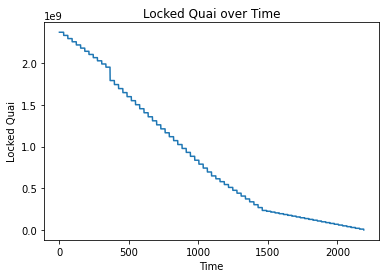

In [4]:
import matplotlib.pyplot as plt

plt.plot(time, locked_quai)
plt.xlabel("Time")
plt.ylabel("Locked Quai")
plt.title("Locked Quai over Time")
plt.show()

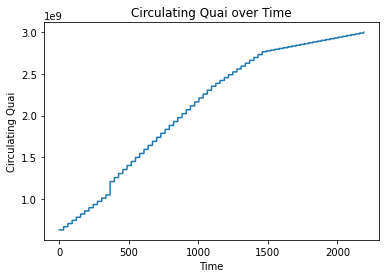

In [5]:
plt.plot(time, circulating_quai)
plt.xlabel("Time")
plt.ylabel("Circulating Quai")
plt.title("Circulating Quai over Time")
plt.show()